In [9]:
from colory.color import Color
from datetime import datetime
import duckdb as ddb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = ddb.read_parquet("../week3/rplace.parquet")

pixel_data = ddb.sql(f"""
    SELECT x, y, COUNT(*) as count
    FROM data
    GROUP BY x, y
    ORDER BY count DESC
""").fetchdf()

filtered_pixel_data = ddb.sql(f"""
    SELECT x, y, count
    FROM pixel_data
    WHERE x >= 300 AND x <= 400 AND y >= 500 AND y <= 600
""").fetchdf()

print(pixel_data[:3])



     x    y  count
0    0    0  98807
1  359  564  69198
2  349  564  55230
         x    y  count
0      359  564  69198
1      349  564  55230
2      354  569  15741
3      360  564  11736
4      359  565  10447
...    ...  ...    ...
10195  343  596      2
10196  329  594      2
10197  317  597      1
10198  354  540      1
10199  364  543      1

[10200 rows x 3 columns]


As show by the above query on the r/place dataset, the top 3 most placed pixels and their counts are as follows:
1. (0, 0)     98,807 times
2. (359, 564) 69,198 times
3. (349, 564) 55,230 times

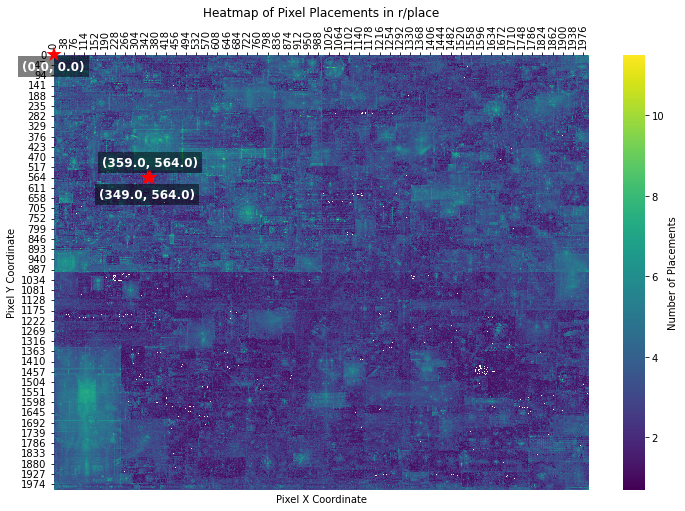

In [2]:
# Create a pivot table for the heatmap with log transformation
pixel_data['log_count'] = np.log1p(pixel_data['count'])
heatmap_data = pixel_data.pivot(index='y', columns='x', values='log_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Placements'})

# Find the top 3 pixels
top_pixels = pixel_data.nlargest(3, 'count')
    
# Different offsets for each annotation
offsets = [25, -100, 50]
for i, (_, row) in enumerate(top_pixels.iterrows()):
    x, y = row['x'], row['y']
    
    # Display the coordinates as text with an offset
    plt.text(
        x, y + offsets[i], f'({x}, {y})',  # Position the text with an offset
        color='white',  # Text color
        ha='center', va='top',  # Center the text
        fontsize=12, fontweight='bold',  # Text styling
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none')  # Background for better visibility
    )
    
    # Add a star symbol
    plt.text(
        x, y, '★',  # Star symbol
        color='red',  # Star color
        ha='center', va='center',  # Center the star
        fontsize=20  # Star size
    )

plt.title('Heatmap of Pixel Placements in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.xticks(rotation=90)

plt.show()

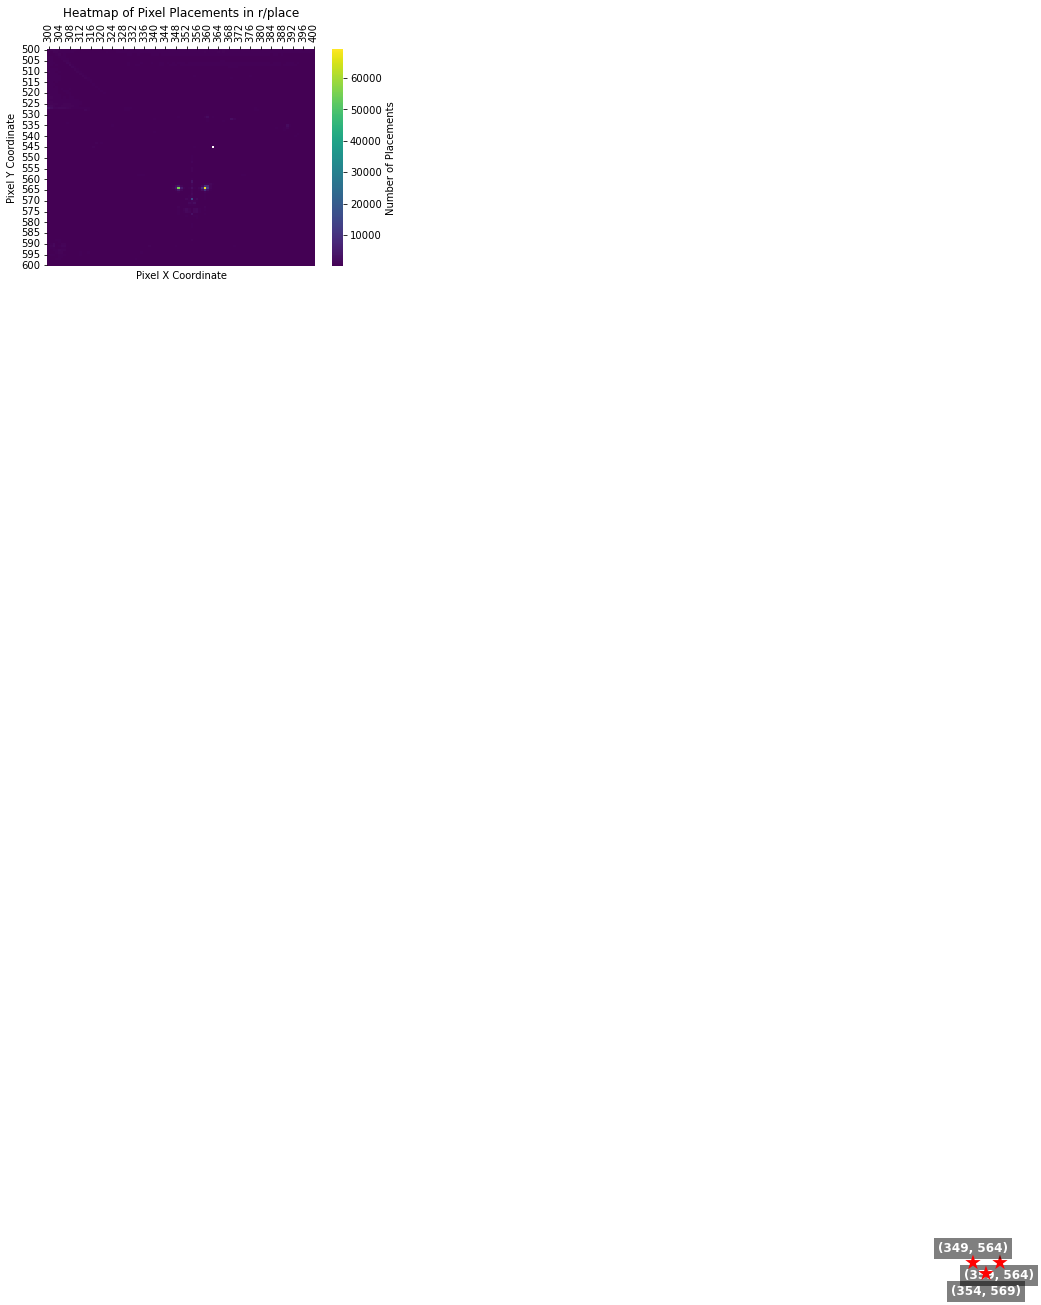

<Figure size 1440x1440 with 0 Axes>

In [10]:
# Create a pivot table for the heatmap with log transformation
# filtered_pixel_data['log_count'] = np.log1p(filtered_pixel_data['count'])
heatmap_data = filtered_pixel_data.pivot(index='y', columns='x', values='count')

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Placements'})

# Find the top 3 pixels
top_pixels = filtered_pixel_data.nlargest(3, 'count')
    
# Different offsets for each annotation
offsets = [2.5, -10, 5]
for i, (_, row) in enumerate(top_pixels.iterrows()):
    x, y = row['x'], row['y']
    
    # Display the coordinates as text with an offset
    plt.text(
        x, y + offsets[i], f'({x}, {y})',  # Position the text with an offset
        color='white',  # Text color
        ha='center', va='top',  # Center the text
        fontsize=12, fontweight='bold',  # Text styling
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none')  # Background for better visibility
    )
    
    # Add a star symbol
    plt.text(
        x, y, '★',  # Star symbol
        color='red',  # Star color
        ha='center', va='center',  # Center the star
        fontsize=20  # Star size
    )

plt.title('Heatmap of Pixel Placements in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.xticks(rotation=90)

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.show()